# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# 1

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, num_tests):
  true_positive_rate = 1
  prob_drunk = prob_drunk_prior

  for test in range(num_tests):
    prob_sober = 1-prob_drunk
    conditional = true_positive_rate * prob_drunk
    marginal = conditional + false_positive_rate * prob_sober

    posterior = conditional / marginal
    
    print(f"Run {test+1}: Probability of being drunk is {posterior}")

    prob_drunk = posterior
    

In [0]:
prob_drunk_given_positive(1/1000, .08, 4)

Run 1: Probability of being drunk is 0.012357884330202669
Run 2: Probability of being drunk is 0.13525210993291495
Run 3: Probability of being drunk is 0.6615996951348605
Run 4: Probability of being drunk is 0.9606895076105054


In [0]:
# It would take 4 positive tests to have a probability over 95% that they are over the legal limit

In [0]:
# 2

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

import pandas as pd

df = pd.read_csv(url, na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df['hours-per-week'].mean()

40.437455852092995

In [0]:
from scipy import stats

In [0]:
ci = stats.bayes_mvs(df['hours-per-week'], alpha=.95)
ci

(Mean(statistic=40.437455852092995, minmax=(40.303343406780165, 40.571568297405825)),
 Variance(statistic=152.45431279269027, minmax=(150.11249049743995, 154.7961350879406)),
 Std_dev(statistic=12.34723907570799, minmax=(12.252407256185776, 12.442070895230202)))

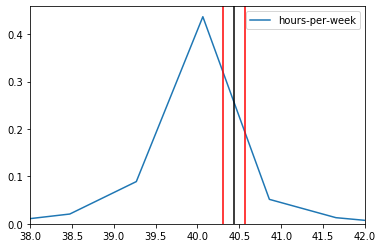

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['hours-per-week'])
plt.xlim(38,42)

plt.axvline(x=ci[0][1][0], color='r')
plt.axvline(x=ci[0][1][1], color='r')
plt.axvline(x=ci[0][0], color='k');



In [0]:
# 3

In [0]:
# Frequentist uses probabilities of observed and unobserved data tests to form a probability of an event occurring. This is observed/total_observations


# Bayes uses a sampling distribution and a prior hypothesis to formulate a posterior distribution with Bayes'Theorem. 
# The prior distribution is then updated to the posterior result and used for the next test. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!